Proyecto Movilidad en CDMX
Martin Lopez

In [1]:
#Empezamos cargando las librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

Seccion 1
Cargar los datos con pandas y read .csv

In [2]:
datoscdmx = pd.read_csv("afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria.csv")
datoscdmx

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,"11,238"
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,"29,475"
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,"31,855"
3,4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,"31,477"
4,5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,"31,493"
...,...,...,...,...,...,...,...,...
18709,18710,Suburbano,L1,Lunes,2021-06-28,NaN,NaN,NaN
18710,18711,Suburbano,L1,Martes,2021-06-29,NaN,NaN,NaN
18711,18712,Suburbano,L1,Miércoles,2021-06-30,NaN,NaN,NaN
18712,18713,Suburbano,L1,Jueves,2021-07-01,NaN,NaN,NaN


Seccion 2
revisar tipos de datos y cantidad de datos nulos

In [3]:
#tipo de datos y cantidad de datos nulos
#se observa que afluencia_tarjeta es la columna con mas datos nulos y que el tipo de dato de fecha esta mal

datoscdmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          18714 non-null  int64 
 1   organismo                   18714 non-null  object
 2   linea_servicio              18225 non-null  object
 3   dia                         18714 non-null  object
 4   fecha                       18714 non-null  object
 5   afluencia_tarjeta           2687 non-null   object
 6   afluencia_boleto            3598 non-null   object
 7   afluencia_total_preliminar  18512 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.1+ MB


In [4]:
#cual es el organismo mas utilizado
#Cuenta todos los valores de la columna "organismo" = STC

datoscdmx["organismo"].value_counts()


STC                5868
STE-Trolebús       4126
RTP                3671
Metrobús           3461
Ecobici             489
STE-Tren Ligero     489
Suburbano           489
STE-Cablebús        121
Name: organismo, dtype: int64

In [5]:

#Cual es la linea de servicio mas utilizada = L1

datoscdmx["linea_servicio"].value_counts()

L1                                                   1467
L5                                                    978
L7                                                    978
L6                                                    978
L2                                                    978
L4                                                    978
L3                                                    978
L1 Eje Central                                        489
L6 Rosario-Chapultepec                                489
L12                                                   489
LB                                                    489
LA                                                    489
L9                                                    489
L8                                                    489
L4 Pto Aéreo-Rosario                                  489
L5 Sn Felipe-Hidalgo                                  489
Xochimilco-Tasqueña                                   489
Expreso Direct

In [6]:
#Dia de la semana de mas uso del Transporte publico  = Martes, Jueves y Viernes

# y por cuanto?  = 3 unidades de diferencia con el lunes
datoscdmx["dia"]=datoscdmx["dia"].replace("Míercoles","Miércoles")
datoscdmx["dia"].value_counts()


Martes       2681
Jueves       2681
Viernes      2681
Miércoles    2680
Lunes        2679
Domingo      2674
Sábado       2638
Name: dia, dtype: int64

Cambiar el tipo de dato de las columnas de afluencia

In [7]:
#Se reemplaza la coma por "" 
datoscdmx["afluencia_tarjeta"]=datoscdmx["afluencia_tarjeta"].str.replace(",","") 

In [8]:
datoscdmx["afluencia_boleto"]=datoscdmx["afluencia_boleto"].str.replace(",","") 

In [9]:
datoscdmx["afluencia_total_preliminar"]=datoscdmx["afluencia_total_preliminar"].str.replace(",","") 

In [10]:
#Se combierte a numeric
datoscdmx["afluencia_tarjeta"]= pd.to_numeric(datoscdmx["afluencia_tarjeta"])

In [11]:
datoscdmx["afluencia_boleto"]= pd.to_numeric(datoscdmx["afluencia_boleto"])

In [12]:
datoscdmx["afluencia_total_preliminar"]= pd.to_numeric(datoscdmx["afluencia_total_preliminar"])

In [13]:
#Se comprueba que se cambiaron los valores
#cuales son las columnas con mayor cantidad de datos nulos? afluencia_tarjeta , afluencia_boleto 
datoscdmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          18714 non-null  int64  
 1   organismo                   18714 non-null  object 
 2   linea_servicio              18225 non-null  object 
 3   dia                         18714 non-null  object 
 4   fecha                       18714 non-null  object 
 5   afluencia_tarjeta           2687 non-null   float64
 6   afluencia_boleto            3598 non-null   float64
 7   afluencia_total_preliminar  18512 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [14]:
columnas_porcentaje=pd.DataFrame()

In [15]:
#Data frame para el porcentaje de datos nulos



columnas_porcentaje["Columnas"]= pd.DataFrame(datoscdmx.columns)


In [16]:
#calculo del los valores nulos por columna
datoscdmx["id"].isnull().sum()

0

In [17]:
#Crear la segunda columna
columnas_porcentaje["Porcentage"]= 0

In [18]:
columnas_porcentaje

,Columnas,Porcentage
0,id,0
1,organismo,0
2,linea_servicio,0
3,dia,0
4,fecha,0
5,afluencia_tarjeta,0
6,afluencia_boleto,0
7,afluencia_total_preliminar,0


In [19]:
#calculo del porcentaje e agregar al data frame
cont=0


for i in datoscdmx:
     
     
     #print(datoscdmx[i].isnull().sum() /len(datoscdmx[i])*100 )
     #print(cont)
     columnas_porcentaje["Porcentage"].iloc[cont]=datoscdmx[i].isnull().sum() /len(datoscdmx[i])*100
     
     cont+=1
     
     

C:\Users\malg4\AppData\Local\Temp\ipykernel_6800\621509692.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columnas_porcentaje["Porcentage"].iloc[cont]=datoscdmx[i].isnull().sum() /len(datoscdmx[i])*100


In [20]:
#DATA FRAME 

columnas_porcentaje

,Columnas,Porcentage
0,id,0.000000
1,organismo,0.000000
2,linea_servicio,2.613017
3,dia,0.000000
4,fecha,0.000000
5,afluencia_tarjeta,85.641766
6,afluencia_boleto,80.773752
7,afluencia_total_preliminar,1.079406


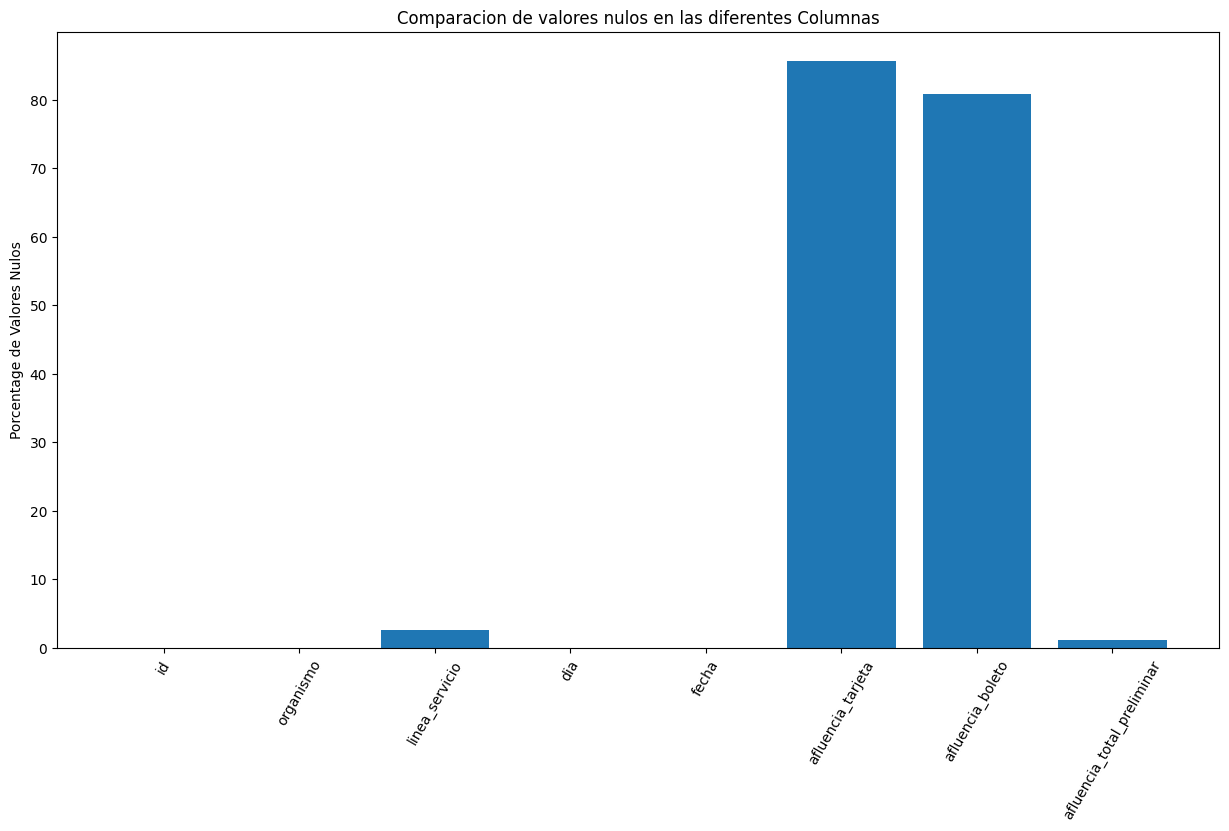

In [21]:
#Se crea una grafica con las especificaciones mencionadas en la presentacion

#X = COLUMNAS   -  Y = PORCENTAJE

plt.rcParams["figure.figsize"] = (15,8) 
plt.bar(columnas_porcentaje["Columnas"],columnas_porcentaje["Porcentage"])
plt.xticks(rotation=60)

plt.ylabel("Porcentage de Valores Nulos")

plt.title("Comparacion de valores nulos en las diferentes Columnas")
plt.show()

Se revisan los datos del data frame para ver que esta pasando con los datos nulos

In [22]:
#Solo se ven valores nulos en afluencia 
datoscdmx.head(20)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,NaN,Domingo,2020-03-01,NaN,NaN,11238.0
1,2,Ecobici,NaN,Lunes,2020-03-02,NaN,NaN,29475.0
2,3,Ecobici,NaN,Martes,2020-03-03,NaN,NaN,31855.0
3,4,Ecobici,NaN,Miércoles,2020-03-04,NaN,NaN,31477.0
4,5,Ecobici,NaN,Jueves,2020-03-05,NaN,NaN,31493.0
5,6,Ecobici,NaN,Viernes,2020-03-06,NaN,NaN,29035.0
6,7,Ecobici,NaN,Sábado,2020-03-07,NaN,NaN,12800.0
7,8,Ecobici,NaN,Domingo,2020-03-08,NaN,NaN,11911.0
8,9,Ecobici,NaN,Lunes,2020-03-09,NaN,NaN,23154.0
9,10,Ecobici,NaN,Martes,2020-03-10,NaN,NaN,31211.0


In [23]:
#Solo se ven valores nulos en afluencia 
datoscdmx.tail(20)

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
18694,18695,Suburbano,L1,Domingo,2021-06-13,NaN,NaN,43027.0
18695,18696,Suburbano,L1,Lunes,2021-06-14,NaN,NaN,93258.0
18696,18697,Suburbano,L1,Martes,2021-06-15,NaN,NaN,93285.0
18697,18698,Suburbano,L1,Miércoles,2021-06-16,NaN,NaN,97223.0
18698,18699,Suburbano,L1,Jueves,2021-06-17,NaN,NaN,95026.0
18699,18700,Suburbano,L1,Viernes,2021-06-18,NaN,NaN,100807.0
18700,18701,Suburbano,L1,Sábado,2021-06-19,NaN,NaN,82796.0
18701,18702,Suburbano,L1,Domingo,2021-06-20,NaN,NaN,45409.0
18702,18703,Suburbano,L1,Lunes,2021-06-21,NaN,NaN,92588.0
18703,18704,Suburbano,L1,Martes,2021-06-22,NaN,NaN,94236.0


In [24]:
#Funcion para crear el data frame dependiendo del organismo especificado
def data(organismo,valor):
    

    data= datoscdmx[datoscdmx[organismo]==valor]
    return data

In [25]:
#Se selecciona un organismo y se guarda el data frame en una variable
data2= data("organismo","STC")

In [26]:
#Funcion para llenar los procentajes 
cont2=0
columnas_porcentaje2=columnas_porcentaje

for i in data2:
     
     
     #print(datoscdmx[i].isnull().sum() /len(datoscdmx[i])*100 )
     #print(cont)
     columnas_porcentaje2["Porcentage"].iloc[cont2]=data2[i].isnull().sum() /len(data2[i])*100
     
     cont2+=1

In [27]:
#Data frame 
columnas_porcentaje2

,Columnas,Porcentage
0,id,0.000000
1,organismo,0.000000
2,linea_servicio,0.000000
3,dia,0.000000
4,fecha,0.000000
5,afluencia_tarjeta,100.000000
6,afluencia_boleto,100.000000
7,afluencia_total_preliminar,0.204499


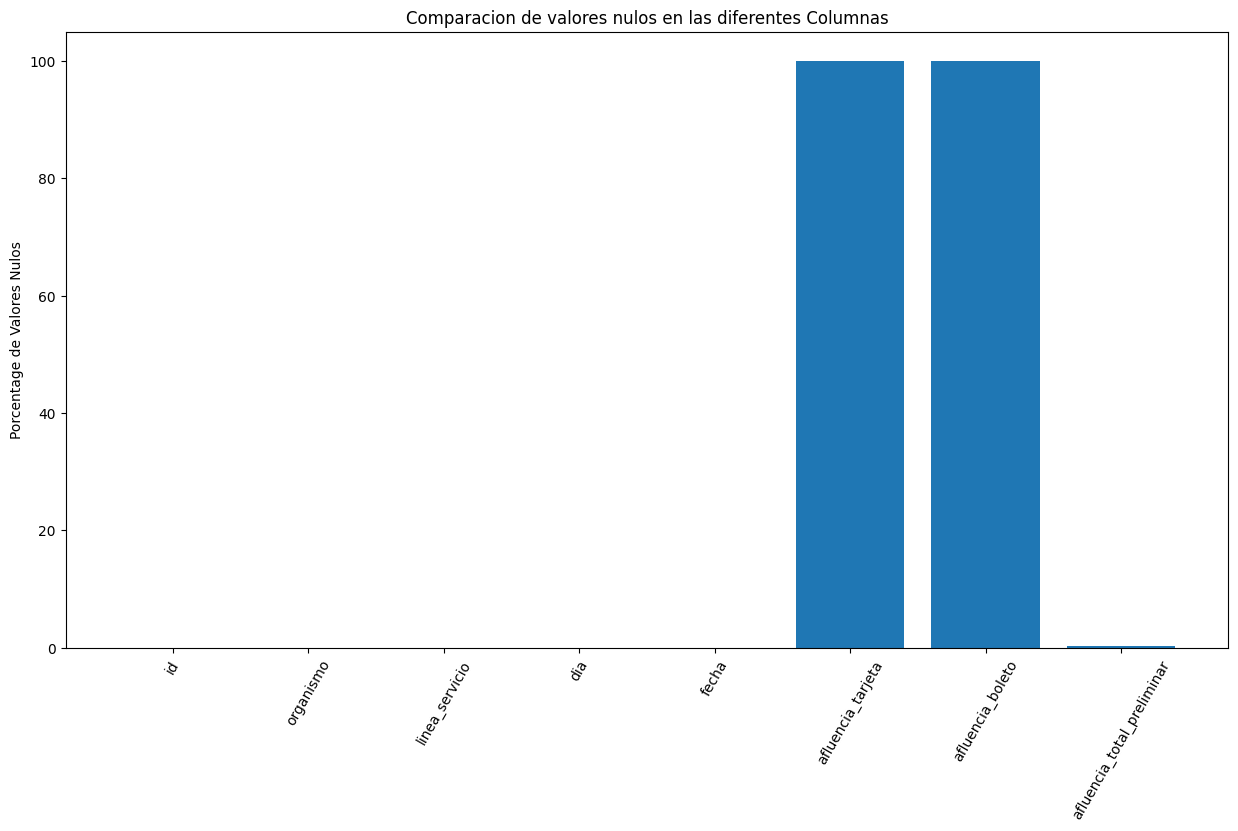

In [28]:
#Se crea una grafica con las especificaciones mencionadas en la presentacion

#X = COLUMNAS   -  Y = PORCENTAJE

plt.rcParams["figure.figsize"] = (15,8) 
plt.bar(columnas_porcentaje2["Columnas"],columnas_porcentaje2["Porcentage"])
plt.xticks(rotation=60)

plt.ylabel("Porcentage de Valores Nulos")

plt.title("Comparacion de valores nulos en las diferentes Columnas")
plt.show()

In [29]:
#funcion para crear el data frame automaticamente


def data3(columna,valor):
    
    dataframe_nulo=datoscdmx[columna].isnull()
    dataframe_nulo

    datos_cdmxnulos= pd.read_csv("afluencia-preliminar-en-transporte-publico.xlsx-afluencia_diaria.csv")
    datos_cdmxnulos[columna]=dataframe_nulo
    data3= datos_cdmxnulos[datos_cdmxnulos[columna]==valor]
    return data3

In [30]:
data4=data3("linea_servicio",True)
data4

,id,organismo,linea_servicio,dia,fecha,afluencia_tarjeta,afluencia_boleto,afluencia_total_preliminar
0,1,Ecobici,True,Domingo,2020-03-01,NaN,NaN,"11,238"
1,2,Ecobici,True,Lunes,2020-03-02,NaN,NaN,"29,475"
2,3,Ecobici,True,Martes,2020-03-03,NaN,NaN,"31,855"
3,4,Ecobici,True,Miércoles,2020-03-04,NaN,NaN,"31,477"
4,5,Ecobici,True,Jueves,2020-03-05,NaN,NaN,"31,493"
...,...,...,...,...,...,...,...,...
484,485,Ecobici,True,Lunes,2021-06-28,NaN,NaN,"13,028"
485,486,Ecobici,True,Martes,2021-06-29,NaN,NaN,"12,499"
486,487,Ecobici,True,Miércoles,2021-06-30,NaN,NaN,"11,876"
487,488,Ecobici,True,Jueves,2021-07-01,NaN,NaN,"13,353"


In [31]:
#Cantidad de valores nulos atribuidos por organismo
data5= data4.groupby("organismo")["linea_servicio"].sum().reset_index()
data5["Porcentage"]=0
data5

,organismo,linea_servicio,Porcentage
0,Ecobici,489,0


In [32]:
data5["Porcentage"]=(data5["linea_servicio"]/len(data4))*100
data5

,organismo,linea_servicio,Porcentage
0,Ecobici,489,100.0


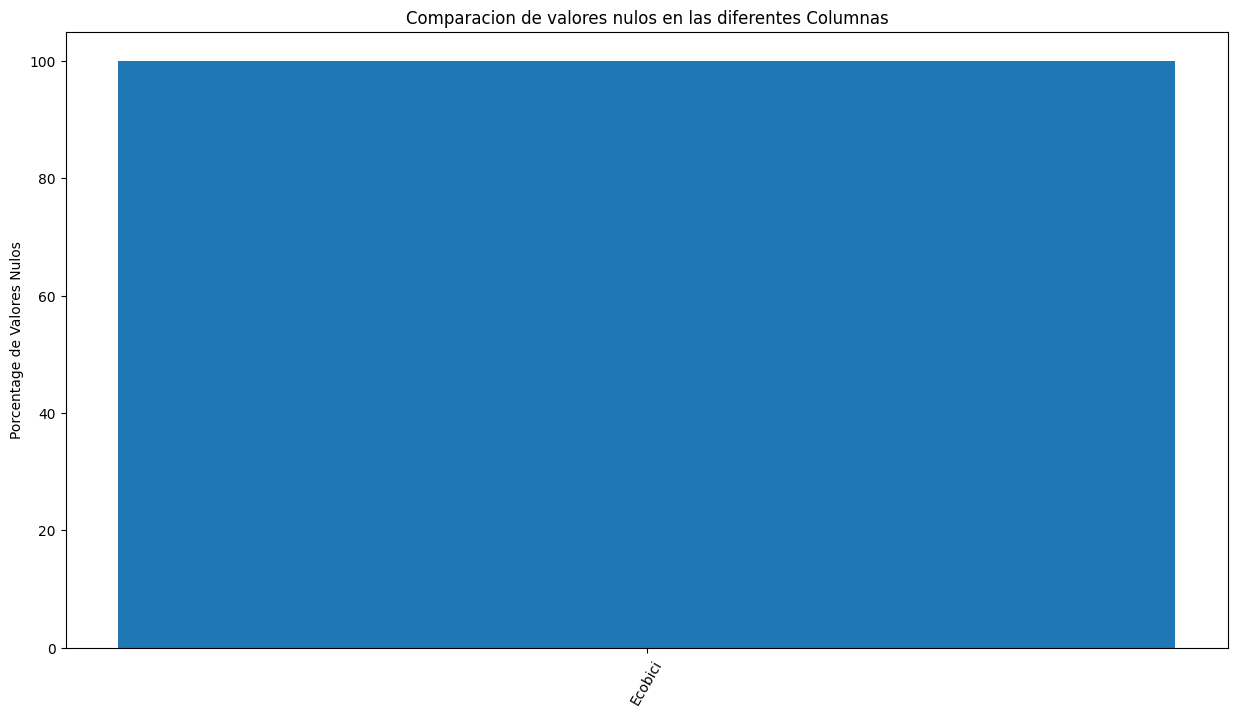

In [33]:
#Se crea una grafica con las especificaciones mencionadas en la presentacion

#X = COLUMNAS   -  Y = PORCENTAJE

plt.rcParams["figure.figsize"] = (15,8) 
plt.bar(data5["organismo"],data5["Porcentage"])
plt.xticks(rotation=60)

plt.ylabel("Porcentage de Valores Nulos")

plt.title("Comparacion de valores nulos en las diferentes Columnas")
plt.show()

In [34]:
#lo mismo pero para afluencia tarjeta

data4=data3("afluencia_tarjeta",True)
data5= data4.groupby("organismo")["afluencia_tarjeta"].sum().reset_index()
data5["Porcentage"]=0

data5["Porcentage"]=(data5["afluencia_tarjeta"]/len(data4))*100
data5

,organismo,afluencia_tarjeta,Porcentage
0,Ecobici,489,3.051101
1,Metrobús,3461,21.594809
2,RTP,984,6.139639
3,STC,5868,36.613215
4,STE-Cablebús,121,0.754976
5,STE-Tren Ligero,489,3.051101
6,STE-Trolebús,4126,25.744057
7,Suburbano,489,3.051101


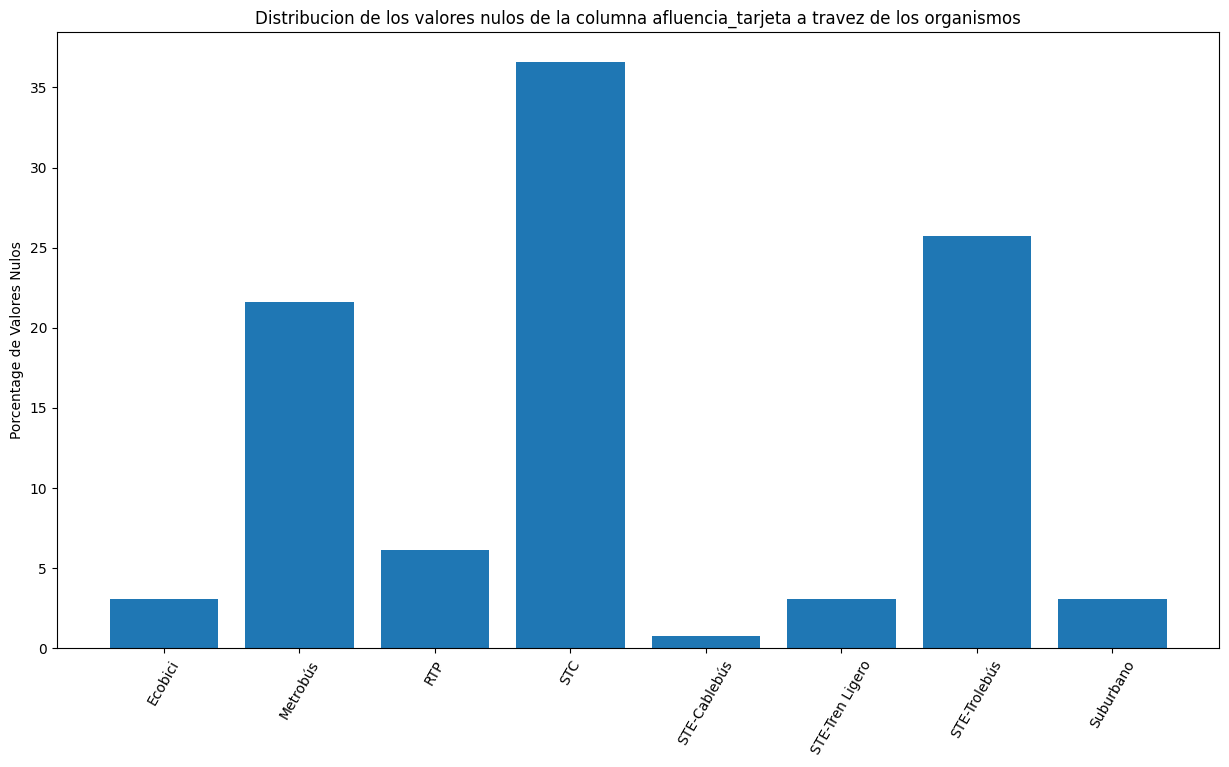

In [35]:
#Se crea una grafica con las especificaciones mencionadas en la presentacion

#X = Organismos   -  Y = PORCENTAJE

plt.rcParams["figure.figsize"] = (15,8) 
plt.bar(data5["organismo"],data5["Porcentage"])
plt.xticks(rotation=60)

plt.ylabel("Porcentage de Valores Nulos")

plt.title("Distribucion de los valores nulos de la columna afluencia_tarjeta a travez de los organismos")
plt.show()

Aqui calculamos como se distribuyen las columnas **afluencia_tarjeta, afluencia_boleto y afluencia_total_preliminar**

In [36]:
#Descripcion de afluencia_boleto

#Promedio = mean      24466.079489

#Se concentra ,mas en valores bajos

datoscdmx["afluencia_boleto"].describe()

count      3598.000000
mean      24466.079489
std       35230.829703
min           0.000000
25%         489.250000
50%        8210.500000
75%       37815.000000
max      220628.000000
Name: afluencia_boleto, dtype: float64

In [37]:
#Descripcion de afluencia_tarjeta

#Promedio = mean     1079.967622

#Se concentra ,mas en valores bajos
datoscdmx["afluencia_tarjeta"].describe()

count    2687.000000
mean     1079.967622
std      1411.527125
min         0.000000
25%        23.000000
50%       348.000000
75%      1791.500000
max      6278.000000
Name: afluencia_tarjeta, dtype: float64

In [38]:
#Descripcion de afluencia_total_preliminar

#Promedio = mean      81567.402388

#Se concentra ,mas en valores bajos
datoscdmx["afluencia_total_preliminar"].describe()

count     18512.000000
mean      81567.402388
std       99310.676230
min           0.000000
25%        7437.750000
50%       46089.000000
75%      118173.750000
max      874324.000000
Name: afluencia_total_preliminar, dtype: float64

(array([1.701e+03, 2.070e+02, 3.000e+02, 2.280e+02, 1.420e+02, 6.600e+01,
        7.000e+01, 8.000e+01, 6.800e+01, 1.090e+02, 1.100e+02, 1.250e+02,
        2.800e+01, 1.400e+01, 2.000e+01, 2.900e+01, 5.400e+01, 4.800e+01,
        1.900e+01, 1.600e+01, 1.400e+01, 2.200e+01, 4.100e+01, 5.400e+01,
        1.700e+01, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00]),
 array([     0. ,   5515.7,  11031.4,  16547.1,  22062.8,  27578.5,
         33094.2,  38609.9,  44125.6,  49641.3,  55157. ,  60672.7,
         66188.4,  71704.1,  77219.8,  82735.5,  88251.2,  93766.9,
         99282.6, 104798.3, 110314. , 115829.7, 121345.4, 126861.1,
        132376.8, 137892.5, 143408.2, 148923.9, 154439.6, 159955.3,
        165471. , 170986.7, 176502.4, 182018.1, 187533.8, 193049.5,
        198565.2, 204080.9, 209596.6, 215112.3, 220628. ]),
 <BarContainer object of 40 artist

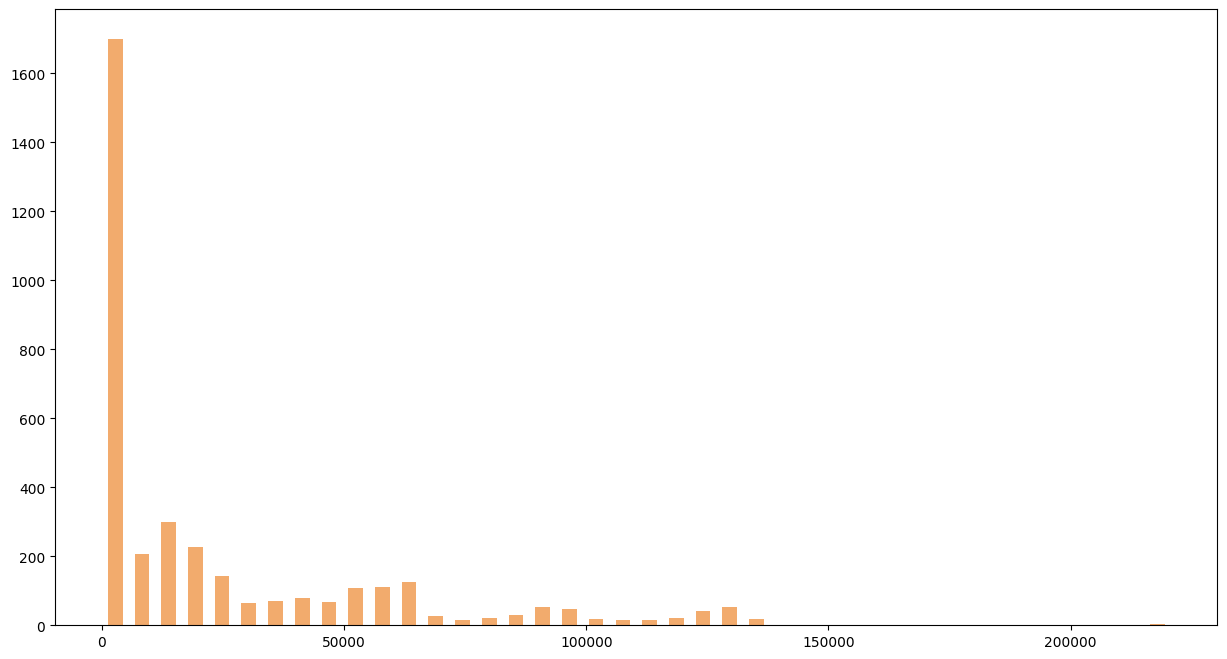

In [39]:
#crear un histograma de 40 bines para revisar la informacion de la columna
plt.hist(datoscdmx["afluencia_boleto"],40, color='#F2AB6D', rwidth=0.55)

(array([1223.,  113.,   61.,   77.,   65.,   79.,   61.,   84.,   97.,
          71.,   69.,   45.,   64.,   66.,   67.,   49.,   50.,   37.,
          31.,   24.,   21.,   27.,   17.,   12.,   12.,   13.,   16.,
           8.,   11.,   10.,   12.,   11.,    9.,   21.,   13.,   19.,
          11.,    5.,    4.,    2.]),
 array([   0.  ,  156.95,  313.9 ,  470.85,  627.8 ,  784.75,  941.7 ,
        1098.65, 1255.6 , 1412.55, 1569.5 , 1726.45, 1883.4 , 2040.35,
        2197.3 , 2354.25, 2511.2 , 2668.15, 2825.1 , 2982.05, 3139.  ,
        3295.95, 3452.9 , 3609.85, 3766.8 , 3923.75, 4080.7 , 4237.65,
        4394.6 , 4551.55, 4708.5 , 4865.45, 5022.4 , 5179.35, 5336.3 ,
        5493.25, 5650.2 , 5807.15, 5964.1 , 6121.05, 6278.  ]),
 <BarContainer object of 40 artists>)

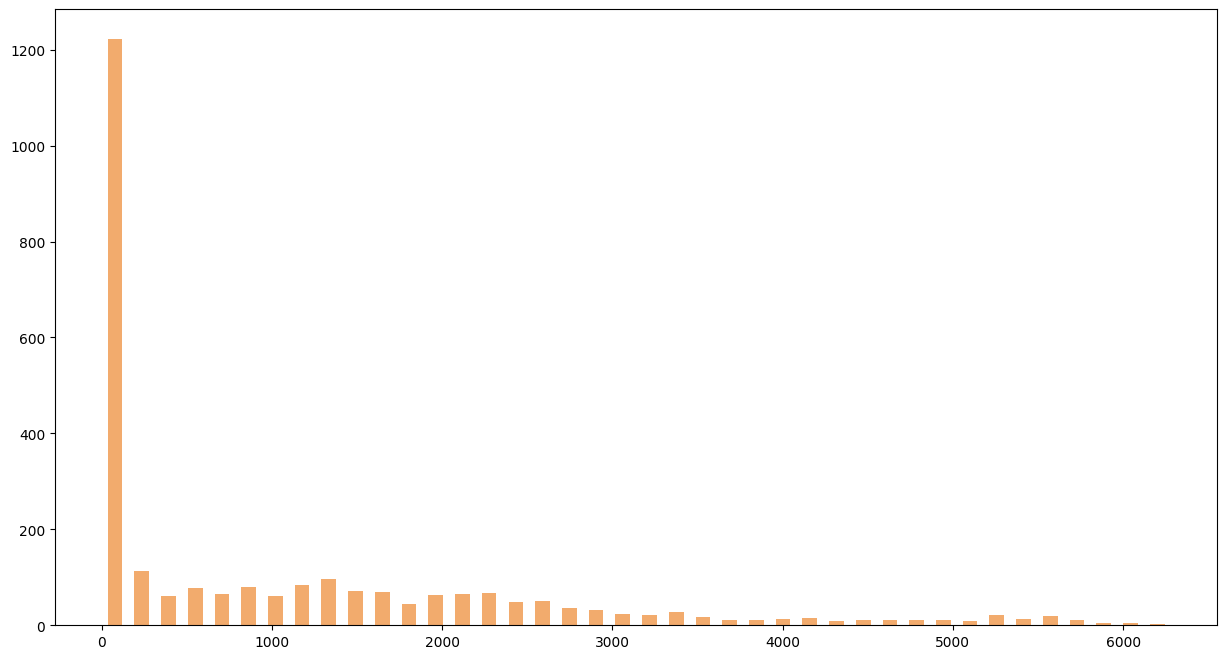

In [40]:
plt.hist(datoscdmx["afluencia_tarjeta"],40, color='#F2AB6D', rwidth=0.55)

(array([7.189e+03, 1.825e+03, 1.935e+03, 1.351e+03, 1.164e+03, 9.130e+02,
        6.330e+02, 4.240e+02, 5.460e+02, 6.650e+02, 5.310e+02, 2.250e+02,
        1.520e+02, 1.320e+02, 1.510e+02, 1.760e+02, 1.490e+02, 1.300e+02,
        5.000e+01, 5.500e+01, 3.800e+01, 1.900e+01, 4.000e+00, 5.000e+00,
        7.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 1.000e+00,
        6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([     0. ,  21858.1,  43716.2,  65574.3,  87432.4, 109290.5,
        131148.6, 153006.7, 174864.8, 196722.9, 218581. , 240439.1,
        262297.2, 284155.3, 306013.4, 327871.5, 349729.6, 371587.7,
        393445.8, 415303.9, 437162. , 459020.1, 480878.2, 502736.3,
        524594.4, 546452.5, 568310.6, 590168.7, 612026.8, 633884.9,
        655743. , 677601.1, 699459.2, 721317.3, 743175.4, 765033.5,
        786891.6, 808749.7, 830607.8, 852465.9, 874324. ]),
 <BarContainer object of 40 artist

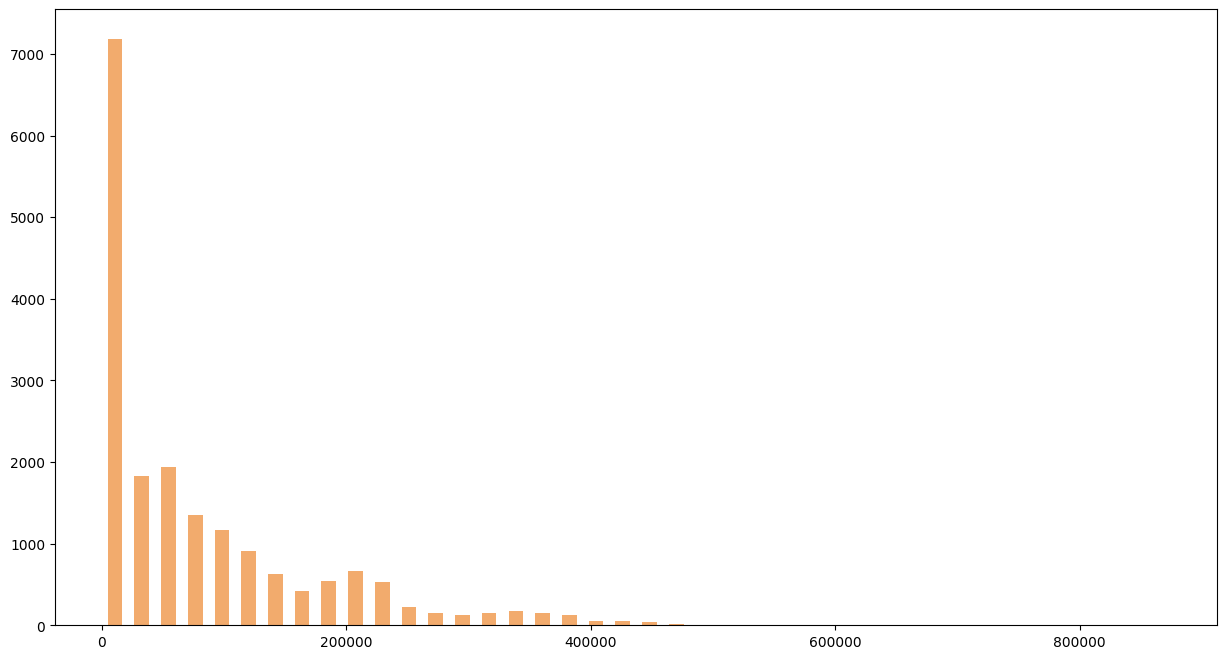

In [41]:
plt.hist(datoscdmx["afluencia_total_preliminar"],40, color='#F2AB6D', rwidth=0.55)

Crear Boxplot de las columnas afluencia_tarjeta, afluencia_boleto y afluencia_total_preliminar

In [42]:
#Se crea el DATA FRAME nuevo para poder hacer el boxplot

BOX = datoscdmx["afluencia_boleto"].reset_index()
BOX["afluencia_tarjeta"]=datoscdmx["afluencia_tarjeta"]
BOX["afluencia_total_preliminar"]=datoscdmx["afluencia_total_preliminar"]
BOX=BOX.drop("index",axis=1)
BOX.describe()

,afluencia_boleto,afluencia_tarjeta,afluencia_total_preliminar
count,3598.000000,2687.000000,18512.000000
mean,24466.079489,1079.967622,81567.402388
std,35230.829703,1411.527125,99310.676230
min,0.000000,0.000000,0.000000
25%,489.250000,23.000000,7437.750000
50%,8210.500000,348.000000,46089.000000
75%,37815.000000,1791.500000,118173.750000
max,220628.000000,6278.000000,874324.000000


<Axes: >

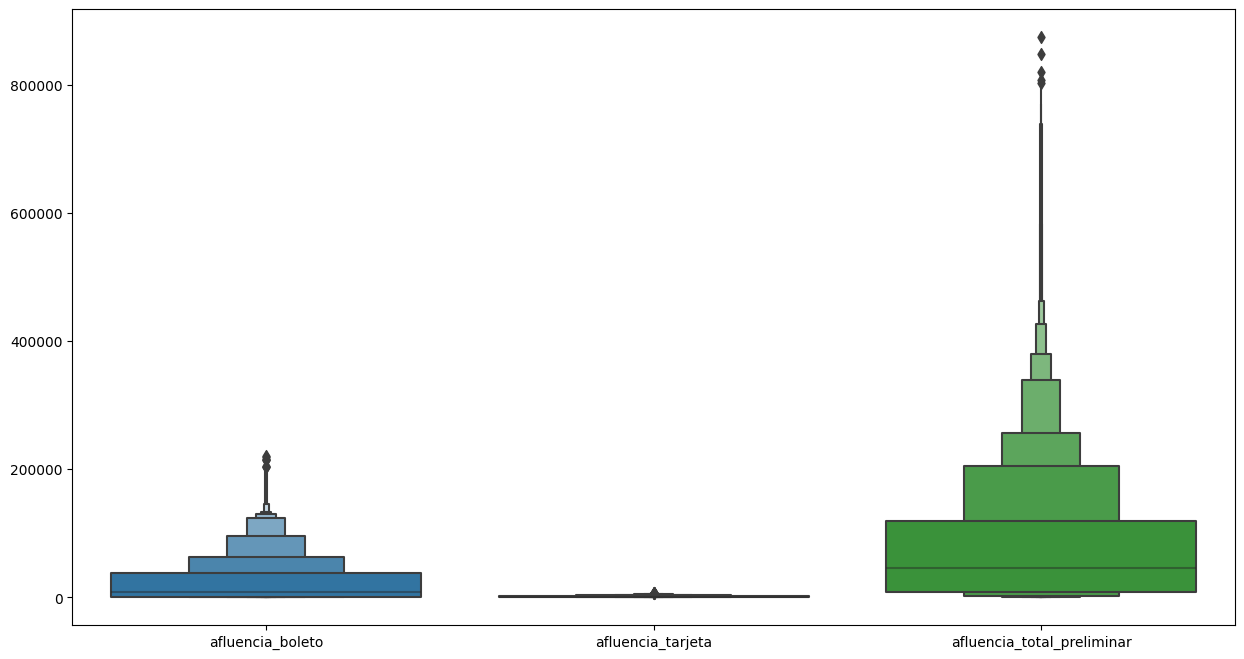

In [43]:
#Se grafica el boxplot

sns.boxenplot(BOX)

Que dia se usa mas en transporte publico?

In [44]:
#Heat map de Dia vs Organismo con la suma de Afluencia_Total_Preliminar
fig= px.density_heatmap(datoscdmx,datoscdmx["dia"],datoscdmx["organismo"],datoscdmx["afluencia_total_preliminar"])
fig.show()

In [45]:
#Heat map de Organismo vs Linea_Servicio con la suma de Afluencia_Total_Preliminar
fig2= px.density_heatmap(datoscdmx,datoscdmx["organismo"],datoscdmx["linea_servicio"],datoscdmx["afluencia_total_preliminar"])
fig2.show()

In [46]:
#Numero de usuario por dia 


datoscdmx.groupby("dia")["afluencia_total_preliminar"].sum().reset_index()


,dia,afluencia_total_preliminar
0,Domingo,128866694.0
1,Jueves,238240944.0
2,Lunes,228317986.0
3,Martes,239477843.0
4,Miércoles,240544976.0
5,Sábado,197344970.0
6,Viernes,237182340.0


In [47]:
#Que linea es la mas mas usada?   L1

#Muestra el porcentaje de alfuencia total preliminar por linea de servicio

linea=datoscdmx.groupby("linea_servicio")["afluencia_total_preliminar"].sum().reset_index()

linea["Porcentage"]=0
cont3=0
for i in range (len(linea)):
     
     linea["Porcentage"].iloc[cont3]= linea["afluencia_total_preliminar"].iloc[cont3] / linea["afluencia_total_preliminar"].sum() * 100
     
     cont3+=1
linea

C:\Users\malg4\AppData\Local\Temp\ipykernel_6800\721120390.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,linea_servicio,afluencia_total_preliminar,Porcentage
0,Atenea,4765065.0,0.316552
1,Eco Atenea,186653.0,0.012400
2,Ecobús,9181715.0,0.609958
3,Expreso,24647012.0,1.637346
4,Expreso Directo,368123.0,0.024455
5,L1,282218802.0,18.748306
6,L1 Campos Revolución-Tlalpexco,385048.0,0.025579
7,L1 Eje Central,22888645.0,1.520534
8,L12,78835682.0,5.237197
9,L2,181470897.0,12.055440


Seccion 3: Limpieza de datos

In [48]:
#Limpiamos todos los datos nulos
#Hacemos el calculo del porcentaje de datos no nulos que nos quedaron en el data frame
lon1=len(datoscdmx)
nuevadata=datoscdmx.dropna(how="any").reset_index().drop("index",axis=1)
lon2=len(datoscdmx.dropna(how="any").reset_index().drop("index",axis=1))
per=lon2/lon1*100
per

14.352890883830288

In [49]:
#Se verifica a ver si hay datos duplicados en el nuevo data frame
#No hay valores duplicados
nuevadata.duplicated().sum()


0

In [50]:
datoscdmx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          18714 non-null  int64  
 1   organismo                   18714 non-null  object 
 2   linea_servicio              18225 non-null  object 
 3   dia                         18714 non-null  object 
 4   fecha                       18714 non-null  object 
 5   afluencia_tarjeta           2687 non-null   float64
 6   afluencia_boleto            3598 non-null   float64
 7   afluencia_total_preliminar  18512 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [51]:
#Cambiar el formato de la columna fecha ya que esta en objeto
datoscdmx["fecha"]=pd.to_datetime(datoscdmx["fecha"], format= "%Y/%m/%d", errors='ignore')
nuevadata["fecha"]=pd.to_datetime(nuevadata["fecha"], format= "%Y/%m/%d", errors='ignore')
datoscdmx.info()
nuevadata.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18714 entries, 0 to 18713
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          18714 non-null  int64         
 1   organismo                   18714 non-null  object        
 2   linea_servicio              18225 non-null  object        
 3   dia                         18714 non-null  object        
 4   fecha                       18714 non-null  datetime64[ns]
 5   afluencia_tarjeta           2687 non-null   float64       
 6   afluencia_boleto            3598 non-null   float64       
 7   afluencia_total_preliminar  18512 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2686 entries, 0 to 2685
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
-

In [52]:
#Imprimir el dia de cada registro de la columna fecha
nuevadata["fecha"].dt.day

0       1
1       1
2       1
3       1
4       1
       ..
2681    1
2682    1
2683    1
2684    1
2685    1
Name: fecha, Length: 2686, dtype: int64

In [53]:
#Imprimir el dia de la semana de cada registro de la columna fecha
nuevadata["fecha"].dt.weekday

0       6
1       6
2       6
3       6
4       6
       ..
2681    3
2682    3
2683    3
2684    3
2685    3
Name: fecha, Length: 2686, dtype: int64

In [54]:
#Cuantas filas contienen el organismo "Metrobús"
datoscdmx["organismo"].str.contains("Metrobús").sum()

3461

In [55]:
##Cuantas filas contienen la Linea "Temporal"
datoscdmx["linea_servicio"].str.contains("Temporal").sum()

155

In [56]:
#Se crea el nuevo data frame para ver el historico de afluencia_total_preliminar 
historico_grafica= datoscdmx.groupby("fecha")["afluencia_total_preliminar"].sum().reset_index()
historico_grafica

,fecha,afluencia_total_preliminar
0,2020-03-01,3527802.0
1,2020-03-02,7120556.0
2,2020-03-03,7314161.0
3,2020-03-04,7361937.0
4,2020-03-05,7386438.0
...,...,...
484,2021-06-28,3670498.0
485,2021-06-29,3800277.0
486,2021-06-30,3595574.0
487,2021-07-01,2805590.0


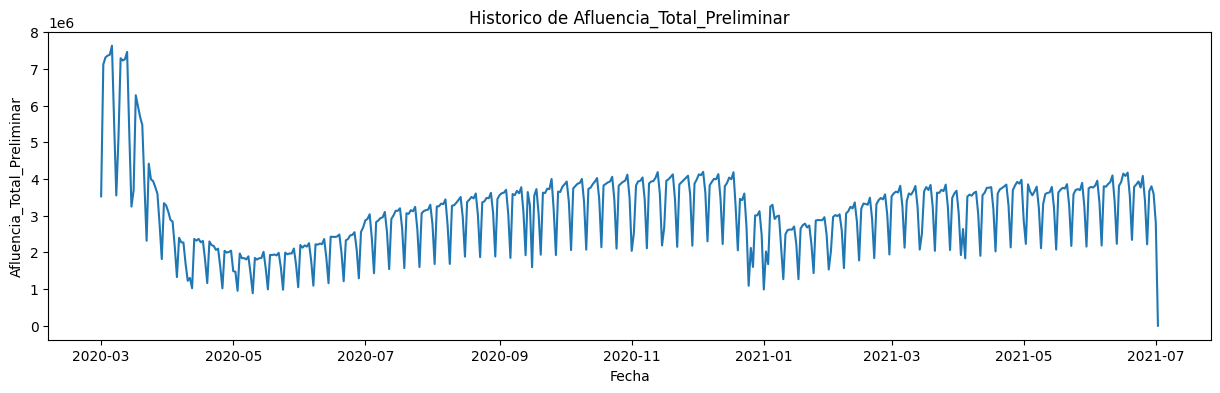

In [57]:
#Grafica de Afluencia X el Tiempo

plt.rcParams["figure.figsize"] = (15,4) 

plt.plot(historico_grafica["fecha"],historico_grafica["afluencia_total_preliminar"])
plt.xticks(rotation=0)
plt.xlabel("Fecha")
plt.ylabel("Afluencia_Total_Preliminar")

plt.title("Historico de Afluencia_Total_Preliminar")
plt.show()